In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
def transform(file, value):
    # list of sheet names or indexes
    sheets = ['WHITE', 'BLACK', 'HISPANIC', 'ASIAN AND OTHER']

    # empty list to store dataframes
    data = []

    for sheet in sheets:
        df = pd.read_excel(file, sheet_name=sheet, header=1)
        df = pd.melt(df, id_vars=["Age"], var_name="Year", value_name=value)
        df['Year'] = df['Year'].astype(int)
        df['Race'] = sheet
        data.append(df)

    return pd.concat(data)

    # data is a list of dataframes, one for each sheet


In [ ]:
def plot_line_chart(df, column):
    data = df.groupby(['Race', 'Year'])[column].mean().reset_index()
    data_group = df.groupby(['Year'])[column].mean().reset_index()

    plt.figure(figsize=(12,6))

    colors = {'ASIAN AND OTHER': 'r', 'BLACK': 'g', 'HISPANIC': 'b', 'WHITE': 'c'}

    for race, color in colors.items():
        df_race = data[data['Race'] == race]
        
        plt.plot(df_race['Year'], df_race[column], color=color, label=race)
    plt.plot(data_group['Year'], data_group[column], color='k', linestyle='dashed', label='Illinois Average')
    # Add labels and a legend
    plt.xlabel('Year')
    plt.ylabel(f'Average {column}')
    plt.title(f'Average {column} by Year and Race')
    plt.legend()
    plt.show()

In [ ]:
def plot_stacked_bar(df, column):
    data = df.groupby(['Race','Year'])[column].sum().reset_index()
    crosstab = data.set_index(['Race','Year'])[column].unstack().T
    crosstab["sum"] = crosstab["ASIAN AND OTHER"] + crosstab["BLACK"] + crosstab["HISPANIC"] + crosstab["WHITE"]
    crosstab["ASIAN AND OTHER"]  = crosstab["ASIAN AND OTHER"] / crosstab["sum"]
    crosstab["BLACK"] = crosstab["BLACK"] / crosstab["sum"]
    crosstab["HISPANIC"] = crosstab["HISPANIC"] / crosstab["sum"]
    crosstab["WHITE"] = crosstab["WHITE"]  / crosstab["sum"]
    crosstab.drop("sum", axis=1, inplace=True)

    ax = crosstab.plot(
        kind='bar', 
        stacked=True, 
        colormap='tab10',
        rot=0,
       figsize=(12, 6)
        )

    for c in ax.containers:

        # Optional: if the segment is small or 0, customize the labels
        labels_ = [v.get_height() if v.get_height() > 0 else '' for v in c]
        
        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(c, labels=[f'{x:.2%}' for x in labels_], label_type='center', color='white')

    plt.legend(loc="upper left", ncol=4)
    plt.ylabel(f"{column} Percentage")
    plt.xlabel("Year")
    plt.show()

In [ ]:
def plot_bar_chart(df, column):
    data = df.value_counts("Race") / df.value_counts("Race").sum()
    ax = data.plot(
        kind="bar",
        colormap='tab10',
        rot=0,
        figsize=(12, 6)
    )
    for c in ax.containers:
        # Optional: if the segment is small or 0, customize the labels
        labels_ = [v.get_height() if v.get_height() > 0 else '' for v in c]
            
        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(c, labels=[f'{x:.2%}' for x in labels_], label_type='center', color='white')

    plt.ylabel(f"{column} Percentage")
    plt.xlabel("Race")
    plt.show()

## Composition

In [ ]:
all_composition = transform('data/HomeownerComp_Age_Race_Ethnicity.xlsx', 'Composition')
all_composition.head()

,Age,Year,Composition,Race
0,15-24,1990,682,WHITE
1,25-34,1990,7911,WHITE
2,35-44,1990,11556,WHITE
3,45-54,1990,9241,WHITE
4,55-64,1990,8563,WHITE


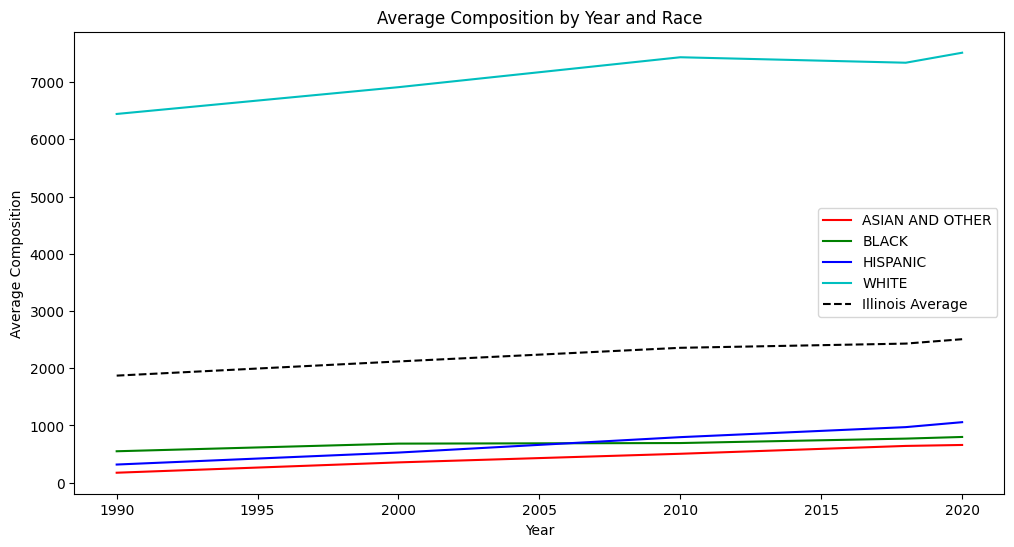

In [ ]:
plot_line_chart(all_composition, "Composition")

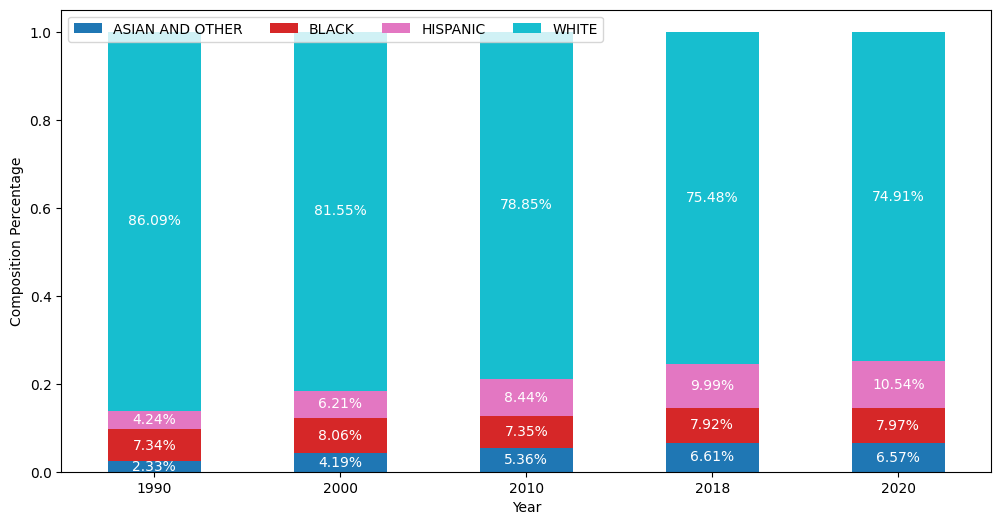

In [ ]:
plot_stacked_bar(all_composition, "Composition")

Over time, the percentages of the Asian and Other, Black, Hispanic, and White races have fluctuated. Generally, the percentage of the White race has remained relatively consistent, while the percentages of the other races have gone up and down. Specifically, the percentage of the Asian and Other race has generally been slightly higher than the other races, followed by the Black and Hispanic races, and then the White race. There have been small changes in these trends over time, but overall, the percentages have remained relatively similar.

## Rates

In [ ]:
all_rates = transform('data/HomeownershipRates_Age_Race_Ethnicity.xlsx', 'Rates')
all_rates.head()

,Age,Year,Rates,Race
0,15-24,1990,19.2,WHITE
1,25-34,1990,52.2,WHITE
2,35-44,1990,73.0,WHITE
3,45-54,1990,80.9,WHITE
4,55-64,1990,84.3,WHITE


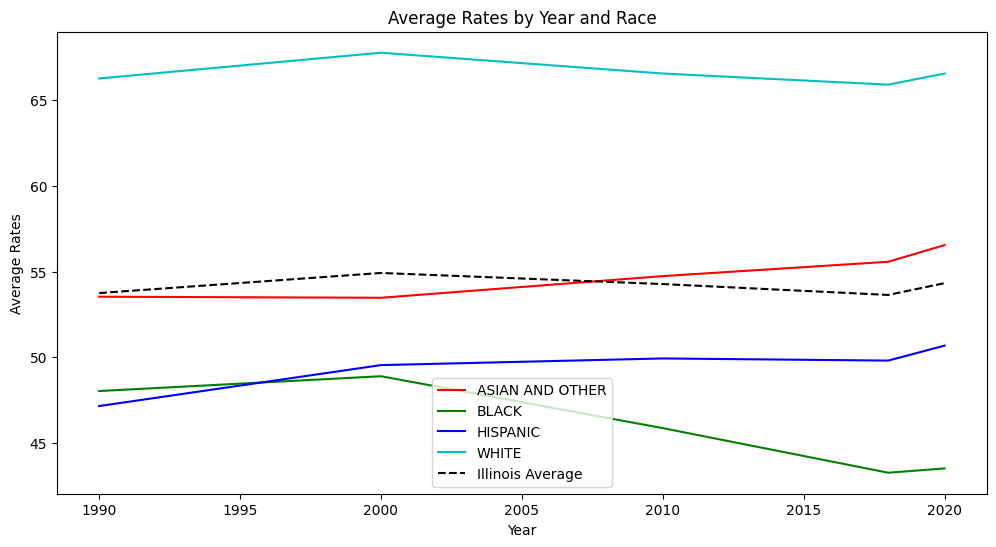

In [ ]:
plot_line_chart(all_rates, "Rates")

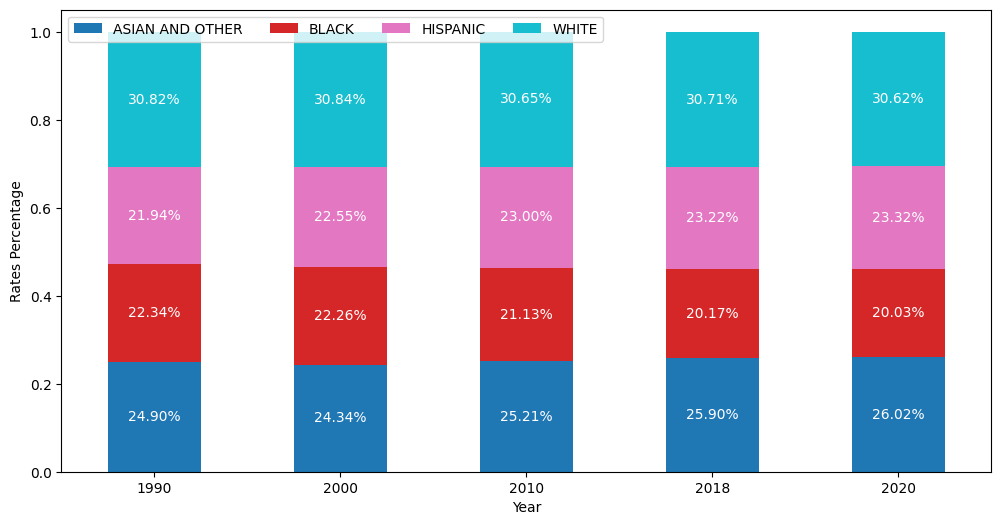

In [ ]:
plot_stacked_bar(all_rates, "Rates")

The distribution of races in this research is uniform, so each of the four races (Asian and Other, Black, Hispanic, and White) is considered to make up 25% of the entire population.

## Home Ownership Rate

In [ ]:
home_ownership_rate = pd.read_csv(
    "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=240&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ILHOWN&scale=left&cosd=1984-01-01&coed=2021-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-01-26&revision_date=2023-01-26&nd=1984-01-01"
    )
home_ownership_rate.head()

,DATE,ILHOWN
0,1984-01-01,62.4
1,1985-01-01,60.6
2,1986-01-01,60.9
3,1987-01-01,61.0
4,1988-01-01,61.4


In [ ]:
home_ownership_rate["Year"] = pd.to_datetime(home_ownership_rate["DATE"]).dt.year
frame = home_ownership_rate.rename(columns={"ILHOWN":"Illinois Home Ownership Rate"})
frame = frame.drop("DATE", axis=1)
frame.head()

,Illinois Home Ownership Rate,Year
0,62.4,1984
1,60.6,1985
2,60.9,1986
3,61.0,1987
4,61.4,1988


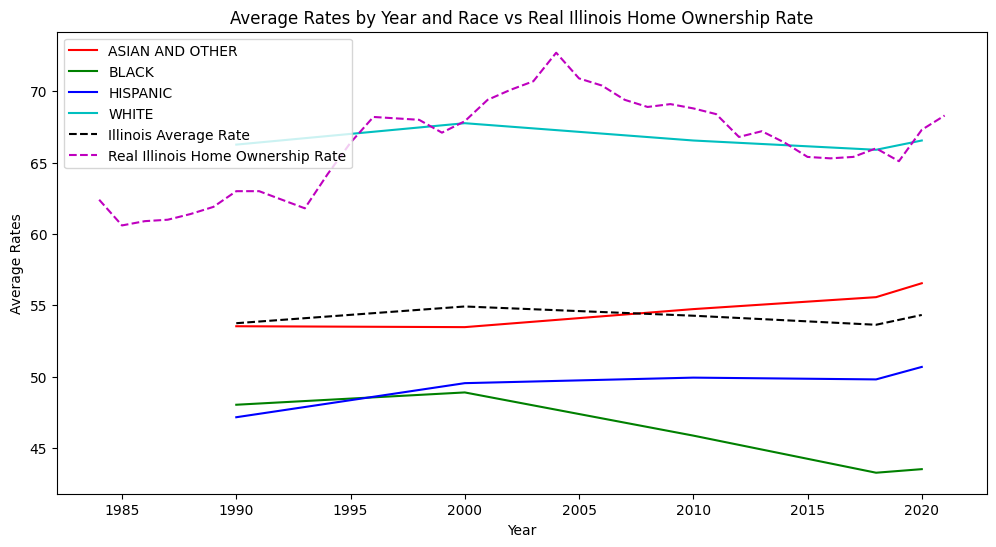

In [ ]:
df = all_rates.copy()
column = "Rates"
data = df.groupby(['Race', 'Year'])[column].mean().reset_index()
data_group = df.groupby(['Year'])[column].mean().reset_index()

plt.figure(figsize=(12,6))

colors = {'ASIAN AND OTHER': 'r', 'BLACK': 'g', 'HISPANIC': 'b', 'WHITE': 'c'}

for race, color in colors.items():
    df_race = data[data['Race'] == race]
    
    plt.plot(df_race['Year'], df_race[column], color=color, label=race)
plt.plot(data_group['Year'], data_group[column], color='k', linestyle='dashed', label='Illinois Average Rate')
plt.plot(frame['Year'], frame["Illinois Home Ownership Rate"], color='m', linestyle='dashed', label='Real Illinois Home Ownership Rate')
# Add labels and a legend
plt.xlabel('Year')
plt.ylabel(f'Average {column}')
plt.title(f'Average {column} by Year and Race vs Real Illinois Home Ownership Rate')
plt.legend()
plt.savefig("Illinois Home Ownership Rates")

The Illinois Home Ownership Rate is a measure of how many people in the state of Illinois own their own homes. The chart above shows the rates of home ownership for different racial groups in Illinois for the years 1990, 2000, 2010, 2018, and 2020. When comparing the Illinois Home Ownership Rate to the rates for each race, it is observed that overall the Illinois Home Ownership Rate is higher than the rate of home ownership for Asian and Other, Black and Hispanic groups, but similar to the rate of home ownership for White group. This suggests that, on average, more White people own their homes in Illinois compared to people from other racial groups.

In [ ]:
rates_df = all_rates.groupby("Year")["Rates"].mean().reset_index().merge(frame, on="Year")
rates_df

,Year,Rates,Illinois Home Ownership Rate
0,1990,53.750000,63.0
1,2000,54.921875,67.9
2,2010,54.275000,68.8
3,2018,53.640625,66.0
4,2020,54.328125,67.3


## Home Ownership Vs Income

In [ ]:
median_household_income = pd.read_csv(
    "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=MEHOINUSILA672N&scale=left&cosd=1984-01-01&coed=2021-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-01-27&revision_date=2023-01-27&nd=1984-01-01"
)
median_household_income["Year"] = pd.to_datetime(median_household_income["DATE"]).dt.year
median_household_income = median_household_income.rename(columns={"MEHOINUSILA672N":"Real Median Household Income"})
median_household_income = median_household_income.drop("DATE", axis=1)
median_household_income.head()

,Real Median Household Income,Year
0,59158,1984
1,59886,1985
2,62740,1986
3,61964,1987
4,65191,1988


In [ ]:
home_ownership_rate["Year"] = pd.to_datetime(home_ownership_rate["DATE"]).dt.year
home_ownership_rate = home_ownership_rate.rename(columns={"ILHOWN":"Illinois Home Ownership Rate"})
home_ownership_rate = home_ownership_rate.drop("DATE", axis=1)
home_ownership_rate.head()

,Illinois Home Ownership Rate,Year
0,62.4,1984
1,60.6,1985
2,60.9,1986
3,61.0,1987
4,61.4,1988


In [ ]:
merged_data = pd.merge(home_ownership_rate, median_household_income, on="Year")
filtered_data = merged_data[merged_data["Year"].isin(all_rates["Year"].unique().tolist())]
filtered_data.head()

,Illinois Home Ownership Rate,Year,Real Median Household Income
6,63.0,1990,65610
16,67.9,2000,72675
26,68.8,2010,63173
34,66.0,2018,75684
36,67.3,2020,77805


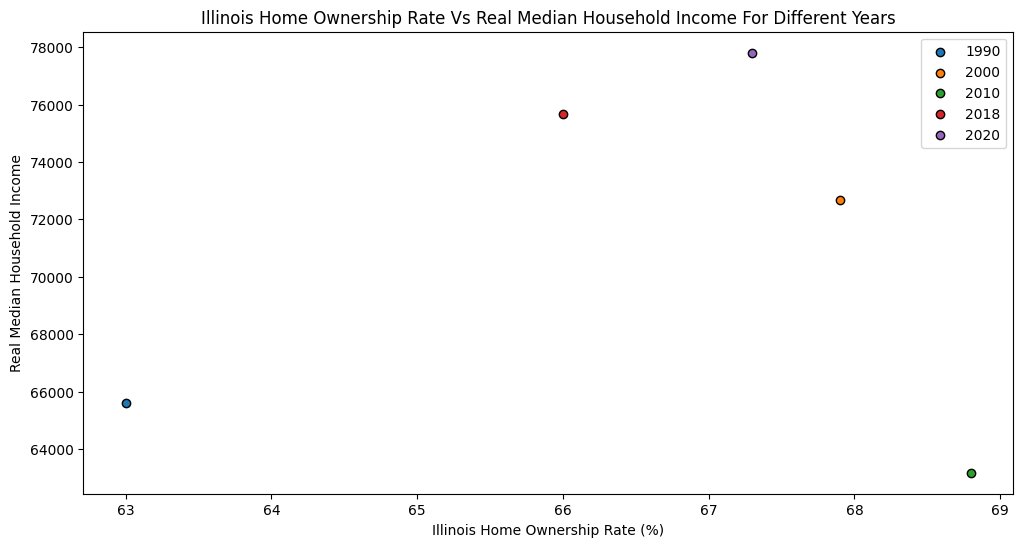

In [ ]:
plt.figure(figsize=(12,6))
years = filtered_data["Year"].unique()
for year in years:
    year_data = filtered_data[filtered_data["Year"] == year]
    plt.scatter(x=year_data["Illinois Home Ownership Rate"], y=year_data["Real Median Household Income"], 
                edgecolors="black", label=str(year))
    
plt.title("Illinois Home Ownership Rate Vs Real Median Household Income For Different Years")
plt.xlabel("Illinois Home Ownership Rate (%)")
plt.ylabel("Real Median Household Income")
plt.legend()
plt.show()
